<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week3/Non_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


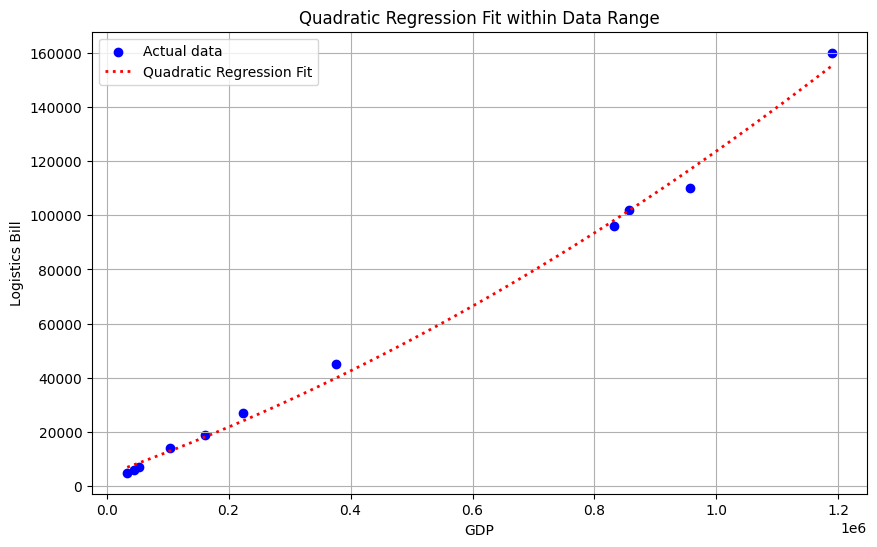

r^2= 0.9957553642468657
y = 0.0000000394x² + (0.0801)x + (4256.8436)
        GDP    GDP_squared  Logistics Bill
0    161800    26179240000           19000
1    104100    10836810000           14000
2    956900   915657610000          110000
3   1189100  1413958810000          160000
4     53400     2851560000            7000
5     33900     1149210000            5000
6    856800   734106240000          102000
7    223600    49996960000           27000
8     45300     2052090000            6000
9    375700   141150490000           45000
10   832600   693222760000           96000
               GDP        GDP_squared  Logistics Bill
count      11.0000            11.0000         11.0000
mean   439381.8182  362832889090.9091      53727.2727
std    432150.6192  493182825258.1115      53840.6740
min     33900.0000    1149210000.0000       5000.0000
25%     78750.0000    6844185000.0000      10500.0000
50%    223600.0000   49996960000.0000      27000.0000
75%    844700.0000  713664500000.0000

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


data = {
    'GDP': [
        161800,104100,956900,1189100,53400,33900,856800,223600,45300,375700,832600
    ],
    'Logistics Bill': [
        19000,14000,110000,160000,7000,5000,102000,27000,6000,45000,96000
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Prepare the features and target
X = df[['GDP']]
y = df['Logistics Bill']  # Use a Series instead of DataFrame

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


# Add a constant to the features for the intercept
X_poly= sm.add_constant(X_poly)

# Fit the model using Ordinary Least Squares
model = sm.OLS(y, X_poly).fit()

# Predictions
y_pred = model.predict(X_poly)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Getting the model parameters for the formula
const, x1,x2 = model.params

# Since coefs will have three values including the coefficient for the intercept term
equation = f'y = {x2:.10f}x² + ({x1:.4f})x + ({const:.4f})'

# Prepare the range for plotting
x_range = np.linspace(X['GDP'].min(), X['GDP'].max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(x_range, y_range_pred, color='red', linestyle=':', linewidth=2, label='Quadratic Regression Fit')
plt.title('Quadratic Regression Fit within Data Range')
plt.xlabel('GDP')
plt.ylabel('Logistics Bill')
#plt.text(500, 100, equation, fontsize=12)  # Display the equation on the plot
plt.legend()
plt.grid(True)
plt.show()

# Calculate the square of Revenue after model fitting to avoid affecting the model
df['GDP_squared'] = df['GDP']**2

pd.options.display.float_format = '{:.4f}'.format

print("r^2=",r2)
print(equation)
df2=pd.DataFrame()
df2['GDP']=df['GDP']
df2['GDP_squared']=df['GDP_squared']
df2['Logistics Bill']=df['Logistics Bill']
print(df2)

# Calculate descriptive statistics for Revenue squared
print(df2.describe())

In [2]:
X = df[['GDP']]
y = df['Logistics Bill']

# Calculate residuals
residuals = y - y_pred

# Create a DataFrame for the required table
results_df = pd.DataFrame({
    'Observation': df.index + 1,
    'Fitted value': y_pred,
    'Residuals': residuals
})

print(results_df)

    Observation  Fitted value  Residuals
0             1    18241.3946   758.6054
1             2    13017.6701   982.3299
2             3   116938.4267 -6938.4267
3             4   155159.8840  4840.1160
4             5     8644.2030 -1644.2030
5             6     7016.0329 -2016.0329
6             7   101771.9143   228.0857
7             8    24127.2647  2872.7353
8             9     7964.2481 -1964.2481
9            10    39895.1633  5104.8367
10           11    98223.7983 -2223.7983


In [3]:
from sklearn.metrics import r2_score, mean_squared_error

# R-squared score
r_square = r2_score(y, y_pred)

# Multiple R would be the square root of R Square for simple linear regression, but since this is polynomial regression, it's the same.
multiple_r = np.sqrt(r_square)

# Adjusted R Square
n = len(X)  # number of observations
p = X_poly.shape[1] - 1  # number of predictors, adjusted for the intercept
adjusted_r_square = 1 - ((1 - r_square) * (n - 1) / (n - p - 1))

# Standard Error of the regression
standard_error = np.sqrt(mean_squared_error(y, y_pred) * (n / (n - p - 1)))

# Observations
observations = n

# Create a DataFrame for the regression statistics
regression_stats = {
    'Multiple R': multiple_r,
    'R Square': r_square,
    'Adjusted R Square': adjusted_r_square,
    'Standard Error': standard_error,
    'Observations': observations
}

regression_stats

{'Multiple R': 0.9978754252144231,
 'R Square': 0.9957553642468657,
 'Adjusted R Square': 0.9946942053085821,
 'Standard Error': 3921.8024071179616,
 'Observations': 11}

In [4]:
from scipy import stats
# Calculate ANOVA metrics
SST = np.sum((y - np.mean(y))**2)  # Total sum of squares
SSR = np.sum((y_pred - np.mean(y))**2)  # Regression sum of squares
SSE = np.sum((y - y_pred)**2)  # Sum of squares of residuals
df_regression = 2  # Two predictors (Investment and its square)
df_residual = n - df_regression - 1
MSR = SSR / df_regression
MSE = SSE / df_residual
F = MSR / MSE
p_value_F = stats.f.sf(F, df_regression, df_residual)

# ANOVA table
anova_table = pd.DataFrame({
    'df': [df_regression, df_residual, df_regression + df_residual],
    'SS': [SSR, SSE, SST],
    'MS': [MSR, MSE, ''],
    'F': [F, '', ''],
    'Significance F': [p_value_F, '', '']
}, index=['Regression', 'Residual', 'Total'])


# Get the summary
print(model.summary())
# ANOVA table
anova_table

                            OLS Regression Results                            
Dep. Variable:         Logistics Bill   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     938.4
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.25e-10
Time:                        20:02:59   Log-Likelihood:                -104.87
No. Observations:                  11   AIC:                             215.7
Df Residuals:                       8   BIC:                             216.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4256.8436   2261.104      1.883      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,SS,MS,F,Significance F
Regression,2,28865137544.2316,14432568772.1158,938.3659,0.0000
Residual,8,123044272.9638,15380534.1205,,
Total,10,28988181818.1818,,,


**Normality test for residuals:**

Desriptive statistics Residuals:
count      11.0000
mean       -0.0000
std      3507.7667
min     -6938.4267
25%     -1990.1405
50%       228.0857
75%      1927.5326
max      5104.8367
Name: Residuals, dtype: float64
Box Plot Values:
Q1: -1990.1405147293603, Q3: 1927.532616325604, IQR: 3917.6731310549644
Lower Bound for Outliers: -7866.650211311808
Upper Bound for Outliers: 7804.042312908051

Rounded Number of classes: 4
class Range: 3010.8158499910205


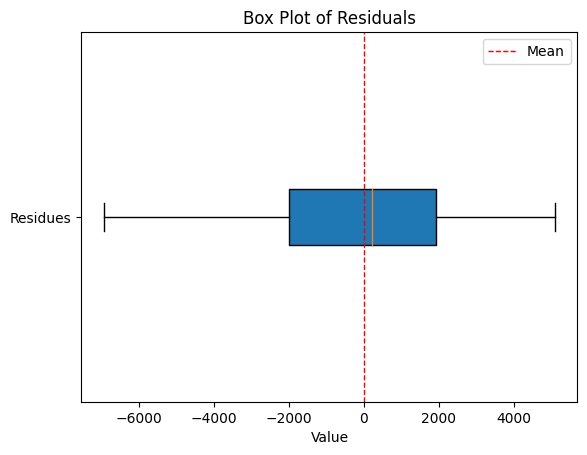

Classes:
   Residuals  Frequency
0 -3927.6109          1
1  -916.7950          4
2  2094.0208          3
3  5104.8367          3 



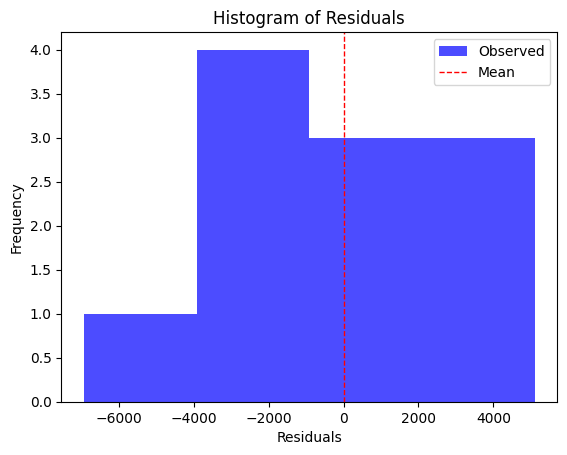

     CDF  Bin Frequency  Expected Value
0 0.1314         0.1314          1.4457
1 0.3969         0.2655          2.9203
2 0.7247         0.3278          3.6061
3 0.9272         0.2025          2.2272
4  Sum =         0.9272         10.1993
Chi-Square Table:
       χ^2
0   0.1374
1   0.3992
2   0.1019
3   0.2682
Sum 0.9066
Chi-square Statistic: 0.782307266830463, p-value: 0.376436423177093


<ipython-input-5-8c538fb5d545>:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

print("Desriptive statistics Residuals:")
print(results_df['Residuals'].describe())


# Calculating the boundaries for outliers
Q1 = results_df['Residuals'].quantile(0.25)
Q3 = results_df['Residuals'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard deviation
mean = results_df['Residuals'].mean()
std_dev = results_df['Residuals'].std()

# Calculate Sturges' number of bins
n = len(df)
k = int(1 + 3.322 * np.log10(n))
classrange = np.ptp(results_df['Residuals']) / k
print("Rounded Number of classes:", k)
print("class Range:", classrange)

# Histogram and expected frequencies
hist, bin_edges = np.histogram(results_df['Residuals'], bins=k)
cdf_values = stats.norm.cdf(bin_edges + classrange, mean, std_dev)

# Box plot
plt.boxplot(results_df['Residuals'], vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Residuals')
plt.xlabel('Value')
plt.yticks([1], ['Residues'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Residuals': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values) - 1):
    if i == 0:
        frequency = cdf_values[0]
    else:
        frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies = np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Expected frequencies
expected_frequencies = expected_values * (hist.sum() / expected_values.sum())


# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies, ddof=2)
hist_df.Residuals = hist_df.Residuals + classrange

print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(results_df['Residuals'], bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_values.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Display the table
print(table_df)

print("Chi-Square Table:")
print(chi_square_df)

# Print the results
print(f"Chi-square Statistic: {chi_square_stat}, p-value: {p_value}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


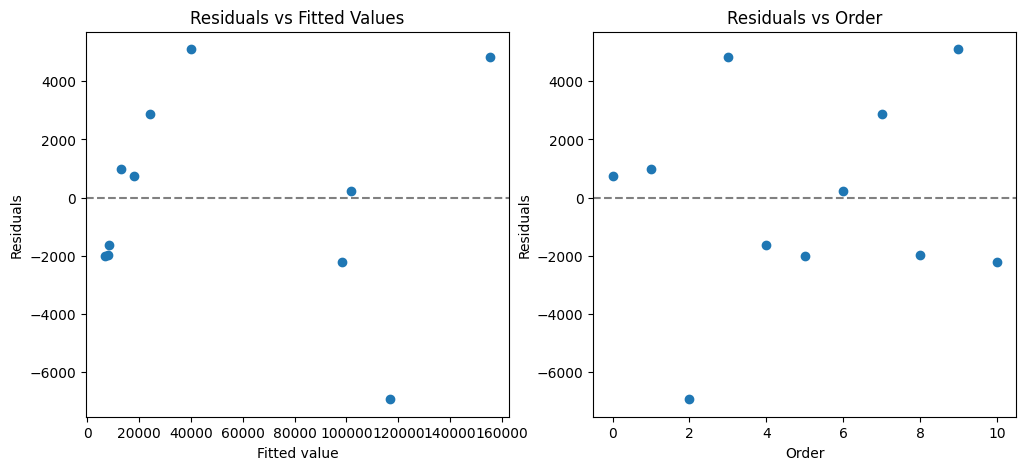

,GDP (x),t_value,St_Error_of_Prediction,Error,Lower_Bound,Point_Prediction,Upper_Bound,Interval
0,600000,2.3060,4313.9826,9948.0618,[[56526.1130000463]],[[66474.17482440393]],[[76422.23664876157]],[[19896.123648715264]]


In [8]:
from scipy import stats

# We need to calculate the standard error of the prediction and the prediction intervals
# Based on the provided parameters and spending values for predictions

# Parameters
alpha = 0.05  # Significance level
prediction_level = 0.95  # Confidence level
x_bar = np.mean(df['GDP'])  # Mean of Spending
s_x = np.std(df['GDP'])  # Standard deviation of Spending
n = len(df)  # Sample size
t_value = stats.t.ppf(1 - alpha/2, df=n-3)  # t-value for 95% confidence/dof=n-1=21

# Spending values for which we want to calculate prediction intervals
GDP_values = [600000]

# Data for the model
X = df['GDP']
y = df['Logistics Bill'].values

# Predictions
y_pred = model.predict(X_poly)

# Residual standard error (RSE)
residuals = y - y_pred
RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

# Define function to calculate prediction interval
def predict_interval(x_new, x_mean, s_x, RSE, n, t_value):
    SE_pred = regression_stats['Standard Error'] * 1.1
    x_new_poly = poly.transform([[x_new]])
    prediction = model.predict([[x_new_poly]])[0]
    lower_bound = prediction - t_value * SE_pred
    upper_bound = prediction + t_value * SE_pred
    return SE_pred, lower_bound, prediction, upper_bound

# Calculate prediction intervals for each spending value
predictions = [predict_interval(x, x_bar, s_x, RSE, n, t_value) for x in GDP_values]

# Prepare the table with the results
prediction_table = pd.DataFrame(predictions,
                                columns=['St_Error_of_Prediction', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound'],
                                index=GDP_values)

# Add t-value and error columns
prediction_table['t_value'] = t_value
prediction_table['Error'] = RSE

# Reorder columns for the final table
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

prediction_table.reset_index().rename(columns={'index': 'GDP (x)'})

# Calculate prediction intervals and error based on t-value * St. Error of Prediction
prediction_table['Error'] = prediction_table['t_value'] * prediction_table['St_Error_of_Prediction']

prediction_table['Interval'] = prediction_table['Upper_Bound'] - prediction_table['Lower_Bound']

# Reorder columns for the final table after updating the Error column
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound','Interval']]

# Prepare the residual plots again with the line connecting points on the second scatter plot
plt.figure(figsize=(12, 5))

# Residuals vs Fitted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, results_df['Residuals'])
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Residuals vs Order of data with line connecting points
plt.subplot(1, 2, 2)
plt.scatter(df.index, results_df['Residuals'])  # Line added here
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Order')
plt.ylabel('Residuals')
plt.title('Residuals vs Order')

#plt.tight_layout()
plt.show()

# Show the updated prediction table
prediction_table.reset_index().rename(columns={'index': 'GDP (x)'})

